In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f*N):] += 5
    return x

In [6]:
x = make_data(1000)

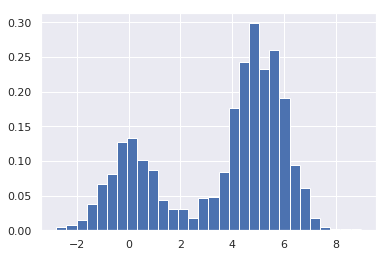

In [12]:
hist = plt.hist(x, bins=30, density=1)